# Compressible Boundary layer

## Equations

The compressible equations are given by:
$$
\begin{align}
 (Cf^{''})^{'} + ff^{''} &=0 \\
\left(\frac{C}{Pr}g_e^{'}\right)^{'} + fg_e^{'} + C\frac{u_\infty}{h_{t\infty}}\left(f^{''}\right)^2 &=0
\end{align}
$$
With the boundary conditions:
$$f(0)=0,\quad f^{'}(0)=0,\quad g_e(0)=g_{e-w}$$
Where 
$$
f^{'} = \frac{u}{u_{\infty}}, \quad g_{e} = \frac{h_t}{h_{t\infty}}, \quad h_s = h_t - \frac{1}{2}u^2
$$
and the $Pr$ and $C$ given by:
$$
Pr(h_s) = \frac{\mu(h_s) c_p(h_s)} {k(h_s)}, \quad C(h_s) =\frac{\rho(h_s) \mu(h_s)}{\rho_\infty\rho_\infty} \\
$$


## Derivation ODE

Rewrite using product rule
\begin{align}
 Cf^{'''} + \left(C^{'}+ f\right)f^{''} &=0 \\
\frac{C}{Pr}g_e^{''}  + \left(\frac{C^{'}}{Pr} + C\left(\frac{1}{Pr}\right)^{'} + f \right)g_e^{'} + C\frac{u_\infty}{h_{t\infty}}\left(f^{''}\right)^2 &=0
\end{align}
Further rewritten
$$ \frac{C}{Pr}g_e^{''}  + \left(\frac{C^{'}}{Pr} + \frac{C}{Pr^2}{Pr}^{'} + f \right)g_e^{'} + C\frac{u_\infty}{h_{t\infty}}\left(f^{''}\right)^2 =0 $$

Define the following variables:
$$
\begin{align}
g &= f^{'}  \\
h &= g^{'}  \\
t &= g_e^{'}
\end{align}
$$

Pluggin into original equations gives:
$$
\begin{align}
Ch^{'} + \left(C^{'}+f\right) h &= 0 \\
f' &= g \\
g' &= h \\
\frac{C}{Pr}t^{'}  + \left(\frac{C^{'}}{Pr} + \frac{C}{Pr^2}{Pr}^{'} + f \right)t + C\frac{u_{\infty}}{h_{t\infty}}\left(h\right)^2 &=0 \\
g_e^{'} &= t
\end{align}
$$
with
$$
\begin{align}
C' &= \frac{1}{\rho_\infty \mu_\infty}\left(\rho^{'}\mu + \rho\mu^{'}\right) \\
Pr' &= \frac{1}{k}\left(\mu^{'}c_p + \mu c_p^{'} \right) - \frac{\mu c_p}{k^2} k^{'}
\end{align}
$$


This gives the following ODEs to be solved

$$
\begin{align}
h^{'} &=- \frac{\left(C^{'}+f\right)}{C} h  \\
f' &= g \\
g' &= h \\
t^{'}  &=- \left(\frac{C^{'}}{C} + \frac{Pr}{Pr}^{'} + \frac{fPr}{C} \right)t - Pr\frac{u_\infty}{h_{t\infty}}\left(h\right)^2 \\
g_e^{'} &= t
\end{align}
$$


With:
$$
\begin{align}
C' &= \frac{1}{\rho_\infty \mu_\infty}\left(\rho^{'}\mu + \rho\mu^{'}\right) \\
Pr' &= \frac{1}{k}\left(\mu^{'}c_p + \mu c_p^{'} \right) - \frac{\mu c_p}{k^2} k^{'}
\end{align}
$$


## Thermodynamic properties
$$
\begin{align}
Pr(h_s) &= \frac{\mu(h_s) c_p(h_s)} {k(h_s)} \\ 
C(h_s)  &=\frac{\rho(h_s) \mu(h_s)}{\rho_\infty\rho_\infty} \\
\end{align}
$$
Given that:
$$
h_s' = h_t{'} - \frac{1}{2} \left( u^2 \right)^{'} = (h_{t\infty}g_e)^{'} - uu^{'} = h_{t\infty}t - u_\infty^2 g h
$$
Results in:
$$
\begin{align}
C' &= \frac{\partial C}{\partial h_s} h_s^{'} = \frac{\partial C}{\partial h_s}  \left(h_{t\infty}t - u_\infty^2 g h\right)\\
Pr' &= \frac{\partial Pr}{\partial h_s} h_s^{'} =  \frac{\partial Pr}{\partial h_s} \left(h_{t\infty}t - u_\infty^2 g h\right)
\end{align}
$$

In [630]:
from scipy.interpolate import interp1d
import  CoolProp.CoolProp as CP
class ThermodynamicTable(object):
    def __init__(self, fluid, p, Tmin, Tmax, T_inf, n):
        self.fluid = fluid
        self.P = p
        self.n  = n
        self.Tmin = Tmin
        self.Tmax = Tmax
        self._set_zeroprop(T_inf)
        self._create_vectors()
        self._create_functions()
    
    def set_prop(self,hs,g,h,t,u_inf,h_inf):
        self.Pr   = self.Prf(hs)
        self.C    = self.Cf(hs)
        self.derPr= self.derPrf(hs)*(h_inf*t-(u_inf**2)*g*h)
        self.derC = self.derCf (hs)*(h_inf*t-(u_inf**2)*g*h)
                    
    def _set_zeroprop(self, T_inf):
        self.mu0 = CP.PropsSI("V", 'P', self.P, "T", T_inf, self.fluid)
        self.rho0= CP.PropsSI("D", 'P', self.P, "T", T_inf, self.fluid)
        self.T0  = T_inf

    def _create_vectors(self):
        self.Tvec    = np.array([self.Tmin+(self.Tmax-self.Tmin)*i/(self.n-1) for i in range(0,self.n)])
        self.Hvec    = np.array([CP.PropsSI("H", 'P', self.P, "T", h, self.fluid) for h in self.Tvec])
        self.Prvec   = np.array([self._calc_Pr(h) for h in self.Hvec])
        self.Cvec    = np.array([self._calc_C (h) for h in self.Hvec])
        self.derCvec = np.array([self._calc_derivative(self._calc_Pr,h) for h in self.Hvec])
        self.derPrvec= np.array([self._calc_derivative(self._calc_C, h) for h in self.Hvec])
 
    def _create_functions(self):
        self.Prf   = interp1d(self.Hvec, self.Prvec,    kind='cubic')
        self.Cf    = interp1d(self.Hvec, self.Cvec ,    kind='cubic')
        self.derPrf= interp1d(self.Hvec, self.derPrvec, kind='cubic')
        self.derCf = interp1d(self.Hvec, self.derCvec , kind='cubic')
    
    def _calc_C(self,H):
        rho = CP.PropsSI("D",'P',self.P, "H", H, self.fluid)
        mu  = CP.PropsSI("V",'P',self.P, "H", H, self.fluid)
        return (rho*mu)/(self.rho0*self.mu0)
        
    def _calc_Pr(self,H):
        mu = CP.PropsSI("V",'P',self.P, "H", H, self.fluid)
        cp = CP.PropsSI("C",'P',self.P, "H", H, self.fluid)
        k  = CP.PropsSI("L",'P',self.P, "H", H, self.fluid)
        return (mu*cp)/k
               
    def _calc_derivative(self,function, h):
        delta = 1e-1
        y2 = function(h+delta)
        y1 = function(h)
        return (y2-y1)/delta
        
    def plot(self):
        fig, ax = plt.subplots()
        ax.plot (self.Hvec/1e3, self.Prvec,   color='r', linestyle='--', label='Pr' )
        ax.plot (self.Hvec/1e3, self.Cvec,    color='r', linestyle='-' , label='C'  )
        ax.set_xlabel("Enthalpy [kJ/kg]")
        ax.set_ylabel("-")
        ax1 = ax.twinx()
        ax1.plot(self.Hvec/1e3, self.derPrvec,color='b', linestyle='--', label="Pr'")
        ax1.plot(self.Hvec/1e3, self.derCvec, color='b', linestyle='-' , label="C'" )
        ax.legend()
        ax1.legend()
        

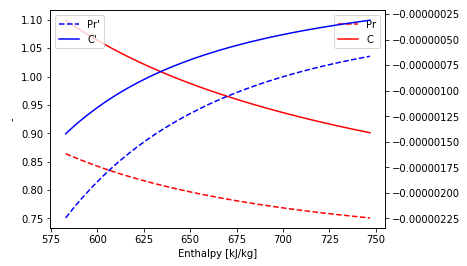

In [632]:
ts = ThermodynamicTable("CO2", p_inf, T_inf*0.9, T_wall*1.1, T_inf, 100)
ts.plot()

## Solve ODES
### Numerical Method
$$
\begin{align}
h(x+\Delta x) &= h(x) -\frac{C^{'}+f(x)}{C}h(x)\Delta x& \\
f(x+\Delta x) &= f(x) +g(x)\Delta x&      \\
g(x+\Delta x) &= g(x) +h(x)\Delta x&      \\
t(x+\Delta x) &= t(x) -\left(\left(\frac{C^{'}}{C} + \frac{Pr^{'}}{Pr} + \frac{fPr}{C} \right)t(x) + Pr\frac{u_\infty}{h_{t\infty}}h(x)^2\right)\Delta x& \\
g_e(x+\Delta x)&= g_e(x)+t(x)\Delta x& \\
\end{align} 
$$

In [652]:
import numpy as np
from scipy.optimize import minimize
fluid = "CO2"

#free stream properties
p_inf = 100e5  # [Pa]
u_inf = 10     # [m/s]
T_inf = 480    # [K]
T_wall= 520    # [K]
ht_w  = CP.PropsSI('H','T', T_wall, "P", p0, fluid )
ht_inf= CP.PropsSI('H','T', T_inf , "P", p0, fluid ) 

#initialize table
ts = ThermodynamicTable(fluid, p_inf, T_inf*0.7, T_wall*1.3,T_inf, 100)


In [663]:
#mesh
n=10000
x = np.linspace(0,10,n); dx = np.diff(x)

#initialization
f = np.zeros(n); g = np.zeros(n); h = np.zeros(n)
ge= np.ones(n);  t = np.zeros(n); 
C = np.zeros(n); derC = np.zeros(n)
Pr= np.zeros(n); derPr= np.zeros(n)

#bc
f[0]=0; g[0]=0; ge[0]=ht_w/ht_inf

#initial guess
h0=0.1; t0=0.1 

def solve_ode(x):
    h[0]=x[0]
    t[0]=x[1]
    for i in range(0,n-1):
        ip=i+1
        hs = ge[i]*h_tinf - 1/2*(g[i]*u_inf)**2
        ts.set_prop(hs,g[i],h[i],t[i], u_inf, ht_inf)
        h[ip]=h[i]  -((ts.derC + f[i])/ts.C)*h[i]*dx[i]
        f[ip]=f[i] + g[i]*dx[i]
        g[ip]=g[i] + h[i]*dx[i]
        t[ip]=t[i] -((ts.derC/ts.C +ts.derPr/ts.Pr + (f[i]*ts.Pr)/ts.C)*t[i] 
                   + ts.Pr*h[i]**2)*dx[i]
        ge[ip]=ge[i]+t[i]*dx[i]
    error = abs(1-g[-1])+abs(1-ge[-1])
    return error

res = minimize(solve_ode, np.array([h0,t0]), method='Nelder-Mead', options={'xtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 63
         Function evaluations: 121


## Plot solution

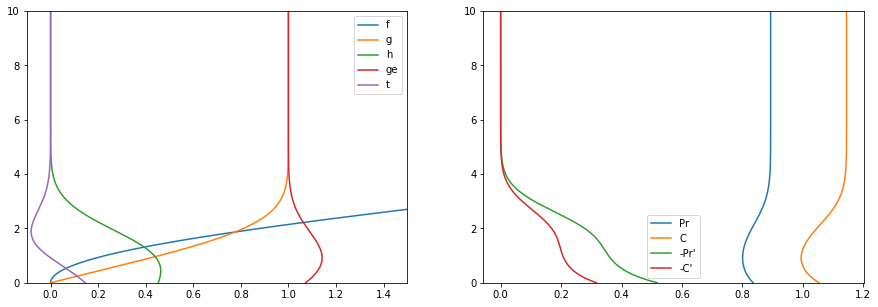

In [661]:
import matplotlib.pyplot as plt
%matplotlib inline

#calc properties
hsv = ge*h_tinf-1/2*(g*u_inf)**2
ts.set_prop(hsv,g,t,h, u_inf, ht_inf)    

#plot
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.plot(f, x,label='f')
ax1.plot(g, x,label='g')
ax1.plot(h, x,label='h')
ax1.plot(ge,x,label='ge')
ax1.plot(t, x,label='t')
ax1.set_xbound(-.1,1.5)
ax1.set_ybound(0,10)
ax1.legend()
ax2.plot(ts.Pr,x, label='Pr')
ax2.plot(ts.C,x, label='C')
ax2.plot(-ts.derPr,x, label="-Pr'")
ax2.plot(-ts.derC,x, label="-C'")
ax2.set_ybound(0,10)
ax2.legend()
plt.savefig("blasius_vp.png")

## Store solution

In [662]:
import pandas as pd
df = pd.DataFrame(np.array([x,f,g,h,ge,t]).T,columns=['x','f','g','h','ge','t'])
df.to_csv("blasius_vp.csv",index=None, sep="\t", header=True)